In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams['font.family'] = ['Trebuchet MS']
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
abgrid_long = pd.read_excel("./analysis/abgrid_long.xlsx").set_index("id").sort_index()
abgrid_wide = pd.read_excel("./analysis/abgrid_wide.xlsx").set_index("id").sort_index()
safa_anx =  pd.read_excel("./analysis/safa_anx.xlsx").set_index("id").sort_index()
mmpia = pd.read_excel("./analysis/mmpia.xlsx").set_index("id").sort_index()
accme = pd.read_excel("./analysis/accme.xlsx").set_index("id").sort_index()
abgrid_long.head(1)

,anno,contesto,lettera,ic_a,kz_a,pr_a,bt_a,cl_a,hu_a,nd_a,ic_b,kz_b,pr_b,bt_b,cl_b,hu_b,nd_b,rp,rr,gp,gr,mp,mr,bl,or,im,ai,ii,st
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abbamondi mario,i,stu,A,0.0,0.111383,0.004934,0.0,0.0,0.017801,1,0.054054,0.157742,0.017352,0.008258,0.054054,0.057605,0,0,2,3,3,0,0,-2,0,2,-2,0,disliked


### ABGRID AFFILIATION AND INFLUENCE INDEX

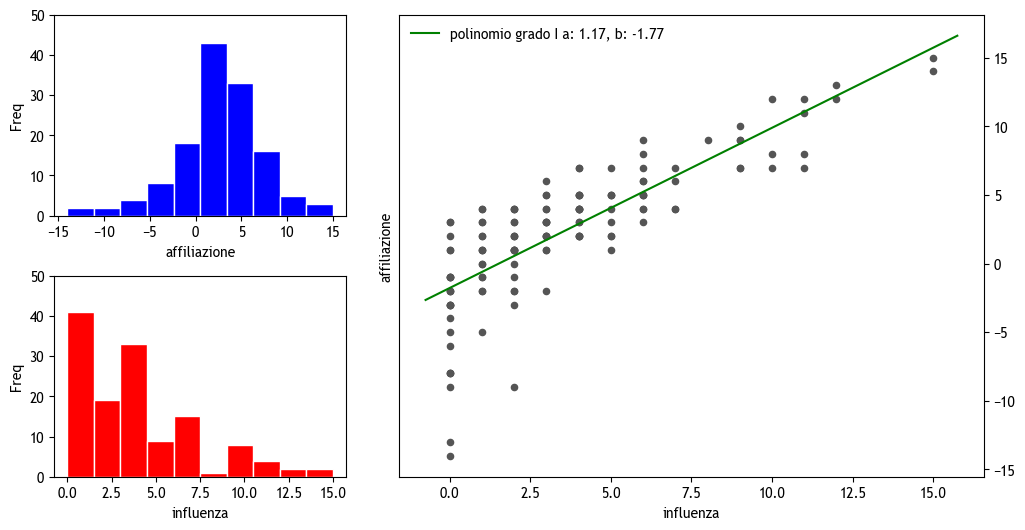

In [4]:
fig = plt.figure(figsize=(12,6))

AFF = "ai"
INF = "ii"

gs = GridSpec(nrows=2, ncols=2, width_ratios=[1,2], hspace=.3, wspace=.12)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])

abgrid_long[AFF].plot.hist(ax=ax1, color="#00F", ec='#FFF')
ax1.set_xlabel("affiliazione")

abgrid_long[INF].plot.hist(ax=ax2, color="#F00", ec='#FFF')
ax2.set_xlabel("influenza")

for ax in (ax1, ax2):
    ax.set_ylabel("Freq")
    ax.set_ylim(0,50)


abgrid_long.plot.scatter(x=INF, y=AFF, color="#555555",  ax=ax3)

coefficients = np.polyfit(abgrid_long[INF], abgrid_long[AFF], 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(ax3.get_xlim()[0], ax3.get_xlim()[1], abgrid_long[INF].shape[0])
y_line = polynomial(x_line)

ax3.plot(x_line, y_line, color='green', label=f'polinomio grado I a: {coefficients[0].round(2) }, b: {coefficients[1].round(2)}')

ax3.yaxis.tick_right()
ax3.set_xlabel("influenza")
ax3.set_ylabel("affiliazione")
ax3.legend(frameon=False);
fig.savefig("./analysis/aff_inf.png", bbox_inches='tight')

## VEGA ANALYSIS

In [5]:
c1 = abgrid_long["anno"] == "i"
c2 = abgrid_long["anno"] == "ii"
c3 = abgrid_long["contesto"] == "lud"
c4 = abgrid_long["contesto"] == "stu"

vega_i_lud = abgrid_long.loc[c1 & c3, :]
vega_i_stu = abgrid_long.loc[c1 & c4, :]
vega_ii_lud = abgrid_long.loc[c2 & c3, :]
vega_ii_stu = abgrid_long.loc[c2 & c4, :]

### MMPIA - VEGA I LUD

In [6]:
columns = ["st"] + mmpia.filter(regex=r".*_scale_t").columns.to_list()


In [7]:
vega_i_lud_mmpia = vega_i_lud.merge(mmpia, left_index=True, right_index=True)
vega_i_lud_mmpia = vega_i_lud_mmpia.loc[:, columns]
vega_i_lud_mmpia.groupby("st").mean().T.style.format(precision=0)

st,ambitendent,appreciated,disliked,marginal,popular,rejected
VRIN_scale_t,35,40,37,42,43,38
TRIN_scale_t,55,60,57,60,57,60
F1_scale_t,41,40,40,40,40,40
F2_scale_t,39,39,39,39,39,42
F_scale_t,38,38,38,38,38,39
L_scale_t,69,64,64,67,67,66
K_scale_t,67,69,71,73,66,76
Hs_scale_t,38,34,33,34,40,39
D_scale_t,46,42,46,46,46,45
Hy_scale_t,52,49,48,45,48,50


### ACCME vs STATUS - VEGA II LUD

In [8]:
df = vega_ii_lud.merge(accme, left_index=True, right_index=True)
df.shape

(29, 34)

In [9]:
columns = accme.filter(regex=r".*_tot").columns.to_list()
agg = ["mean"]

def get_table(data, columns, grouper, style=True):
    table =  (
        data.loc[:, columns]
            .groupby(grouper, observed=True)
            .agg(agg)
    )
    if style:
       return table.style.format(precision=1, na_rep="-")
    return table

In [10]:
grouper = "st"
display(df["st"].unique())
(get_table(df, ["st", *columns ], grouper, False)
    .reindex([
        "popular",
        "appreciated",
        "marginal",
        "ambitendent",
        "disliked",
        "controvsersial",
        "rejected",
        "isolated"
    ]).style.format(precision=0, na_rep="-")
)

array(['appreciated', 'disliked', 'marginal', 'ambitendent', 'popular'],
      dtype=object)

,ce_tot,cme_tot,ae_tot,ap_tot
,mean,mean,mean,mean
st,,,,
popular,102,108,70,96
appreciated,113,123,88,108
marginal,122,130,89,119
ambitendent,116,92,79,90
disliked,108,127,86,117
controvsersial,-,-,-,-
rejected,-,-,-,-
isolated,-,-,-,-


### ACCME vs AFFILIATION INDEX - VEGA II LUD

In [11]:
grouper = pd.qcut(df["ai"], [0, .3, .7, 1], labels=["LO","MD","HI"])
get_table(df, ["ai", *columns], grouper)

,ai,ce_tot,cme_tot,ae_tot,ap_tot
,mean,mean,mean,mean,mean
ai,,,,,
LO,-1.6,111.0,128.4,87.3,117.0
MD,3.3,117.5,122.0,84.9,110.3
HI,7.1,106.1,117.9,85.1,102.1


### ACCME vs INFLUENCE INDEX - VEGA II LUD

In [12]:
grouper = pd.qcut(df["ii"], [0, .3, .7, 1], labels=["LO","MD","HI"])
get_table(df, ["ii", *columns], grouper)

,ii,ce_tot,cme_tot,ae_tot,ap_tot
,mean,mean,mean,mean,mean
ii,,,,,
LO,1.6,113.8,126.5,87.8,115.1
MD,4.3,111.9,122.1,85.1,108.0
HI,8.0,109.2,117.8,83.4,104.0


### ACCME vs IMPACT - VEGA II LUD

In [13]:
grouper = pd.qcut(df["im"], [0, .3, .7, 1], labels=["LO","MD","HI"])
get_table(df, ["im", *columns], grouper)

,im,ce_tot,cme_tot,ae_tot,ap_tot
,mean,mean,mean,mean,mean
im,,,,,
LO,1.9,113.9,126.5,87.3,112.9
MD,4.4,108.8,122.7,85.6,108.8
HI,6.9,113.3,118.6,84.1,107.6


In [14]:
grouper = pd.qcut(df["pr_a"], [0, .3, .7, 1], labels=["LO","MD","HI"])
get_table(df, ["pr_a", *columns], grouper)

,pr_a,ce_tot,cme_tot,ae_tot,ap_tot
,mean,mean,mean,mean,mean
pr_a,,,,,
LO,0.0,117.6,126.7,88.1,115.3
MD,0.0,109.5,123.4,86.1,110.5
HI,0.1,109.4,118.0,82.9,103.6


In [15]:
vega_ii_lud

,anno,contesto,lettera,ic_a,kz_a,pr_a,bt_a,cl_a,hu_a,nd_a,ic_b,kz_b,pr_b,bt_b,cl_b,hu_b,nd_b,rp,rr,gp,gr,mp,mr,bl,or,im,ai,ii,st
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abbamondi mario,ii,lud,A,0.107143,0.189548,0.057399,0.052910,0.366700,0.050918,0,0.035714,0.174050,0.025082,0.000000,0.047619,0.000000e+00,2,3,1,3,0,2,0,2,3,4,5,5,appreciated
albanese michelle,ii,lud,B,0.178571,0.214826,0.038896,0.150551,0.388593,0.009917,0,0.035714,0.182663,0.042476,0.033069,0.194444,8.176929e-02,0,5,1,3,3,2,1,4,0,6,4,7,appreciated
bonfanti francesca,ii,lud,C,0.107143,0.168415,0.012132,0.036243,0.185969,0.025210,0,0.178571,0.237789,0.053880,0.000000,0.206044,0.000000e+00,2,3,5,3,0,0,0,-2,3,8,1,3,disliked
ciliento giacomo pio,ii,lud,D,0.214286,0.238072,0.067044,0.103770,0.419931,0.049236,0,0.000000,0.156802,0.018394,0.000000,0.000000,0.000000e+00,3,6,0,3,0,2,0,6,3,6,9,8,appreciated
criscuolo lorenzo,ii,lud,E,0.000000,0.128084,0.005375,0.000000,0.000000,0.062184,1,0.035714,0.175068,0.030429,0.002646,0.157563,9.207119e-03,0,0,1,3,1,0,0,-1,2,1,1,0,marginal
cristiano asia assunta,ii,lud,F,0.035714,0.144328,0.010288,0.000000,0.201827,0.010933,0,0.107143,0.206429,0.040852,0.048280,0.170732,7.892696e-02,0,1,3,3,3,1,0,-2,0,4,-2,2,disliked
de luca gaia,ii,lud,G,0.071429,0.162447,0.017341,0.041270,0.252774,0.007949,0,0.000000,0.156802,0.018394,0.000000,0.000000,0.000000e+00,3,2,0,3,0,2,0,2,3,2,5,4,appreciated
donini joshua,ii,lud,H,0.142857,0.206045,0.043934,0.125246,0.394481,0.039331,0,0.035714,0.182663,0.042476,0.067460,0.194444,6.190742e-02,0,4,1,3,3,2,1,3,0,5,3,6,appreciated
donvito francesco,ii,lud,I,0.214286,0.244229,0.068085,0.135736,0.419931,0.014918,0,0.000000,0.156802,0.018394,0.000000,0.000000,0.000000e+00,3,6,0,3,0,3,0,6,3,6,9,9,appreciated
